<a href="https://colab.research.google.com/github/namratesh/Machine-Learning/blob/master/7_Tensorflow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
''' CNN  - Convolution Neural Netwroks(CNNs) are major break through in image recognition made in th epast few years.
in this tutorial, we will build 4-layer Convolution Neuarl Network to impore accuracy in predicting the MNIST digits.
 '''

' CNN  - Convolution Neural Netwroks(CNNs) are major break through in image recognition made in th epast few years.\nin this tutorial, we will build 4-layer Convolution Neuarl Network to impore accuracy in predicting the MNIST digits.\n '

In [6]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [7]:
#load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
'''
Loading dataset return 4 numpy array
* images are 28*28 numpy arrays with pixel values from 0 to 255.
* labels are an array of integers, ranging from 0 t 9.
These correspond to class of clothing the image:

Label	  Class
0	      T-shirt/top
1	      Trouser
2	      Pullover
3      	Dress
4	      Coat
5	      Sandal
6	      Shirt
7	      Sneaker
8	      Bag
9	      Ankle boot

* Each image is mapped to single label.

'''

'\nLoading dataset return 4 numpy array\n* images are 28*28 numpy arrays with pixel values from 0 to 255.\n* labels are an array of integers, ranging from 0 t 9.\nThese correspond to class of clothing the image:\n\nLabel\t  Class\n0\t      T-shirt/top\n1\t      Trouser\n2\t      Pullover\n3      \tDress\n4\t      Coat\n5\t      Sandal\n6\t      Shirt\n7\t      Sneaker\n8\t      Bag\n9\t      Ankle boot\n\n* Each image is mapped to single label.\n\n'

In [0]:
#class names are included in dataset, so we have to add it
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore data

In [10]:
#training image size
train_images.shape

(60000, 28, 28)

In [11]:
#len of training labels
len(train_labels)

60000

In [12]:
#train_labels
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
#test image size
test_images.shape

(10000, 28, 28)

In [14]:
#test set image labels
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Process the data

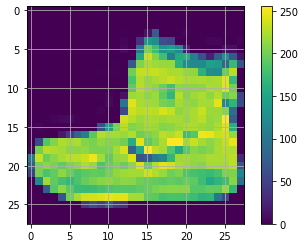

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [0]:
#scale these value to a range 0 to 1 before feeding them to the neural network model.
train_images = train_images / 255.0
test_images = test_images / 255.0

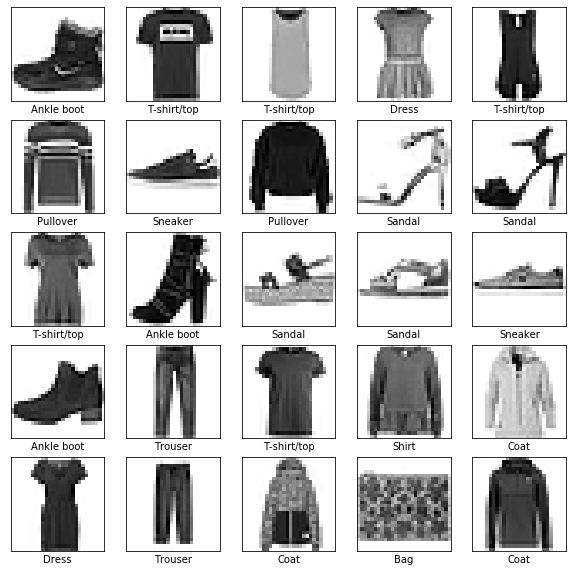

In [17]:
#display top 25 images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [18]:
#set up the layers
model = keras.Sequential([
      #transorm the format image from 2D (28,28) to 1d(28*28=784)
       keras.layers.Flatten(input_shape = (28,28)),
       
       #densely connected nerual layers. First dense layer has 128 nodes
       #second layers has 10 node softmax layer that return array of 10 
       #probability scores that sum 1
       keras.layers.Dense(128, activation='relu'),
       keras.layers.Dense(10)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Compile The Model

In [0]:
#before training out model it needs few things
'''
Loss function - measure how accurate the model is during training time

optimizer - model is updated based on the data it sees and its loss function

metrics - used to monitor the training and testing steps
'''

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

## Train the model
Training the model needs below steps:
1. Feed the data into taring model
2. model learns to associate images and labels
3. ask the model to make prediction using test set images
4. verify that prediction

In [20]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4988 - acc: 0.8233
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3748 - acc: 0.8642
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3379 - acc: 0.8773
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3100 - acc: 0.8874
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2942 - acc: 0.8921
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2796 - acc: 0.8962
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2659 - acc: 0.9014
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2559 - acc: 0.9035
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2483 - acc: 0.9074
Epoch 10/10
60000/60000 [==============================] - 

## Evaluate Accuary

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("test accuarcy: ", test_acc)

10000/10000 - 0s - loss: 0.3222 - acc: 0.8889
test accuarcy:  0.8889


In [0]:
'''
by evaluating train and test accuarcy we can see out test accuarcy 
has been decrease so our model is overfitting. 

Overfitting - is when a ml model performs bad on test data but good 
              on train dataset.
'''

#make Prediction
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
prediction = prob_model.predict(test_images)

In [24]:
#prediction is an array of 10 numbers. It's present model is confidence that
#the image corresponds to each of the 10 different articles of clothing

prediction[2]

array([9.7382435e-10, 1.0000000e+00, 5.5848369e-14, 4.9931992e-10,
       3.6315645e-11, 9.6982681e-20, 1.1333281e-11, 1.4930565e-23,
       2.3311036e-12, 2.0502767e-17], dtype=float32)

In [25]:
np.argmax(prediction[2])

1

In [26]:
test_labels[2]

1

In [0]:
#graph this to look at the full set of 10 class
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
             
                                        
                                                                                

In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

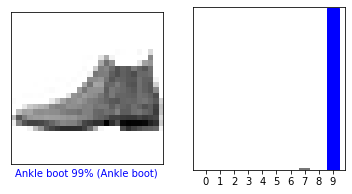

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

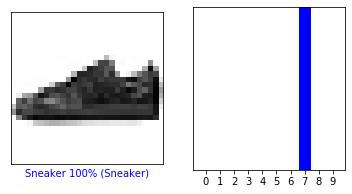

In [42]:
i = 22
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()


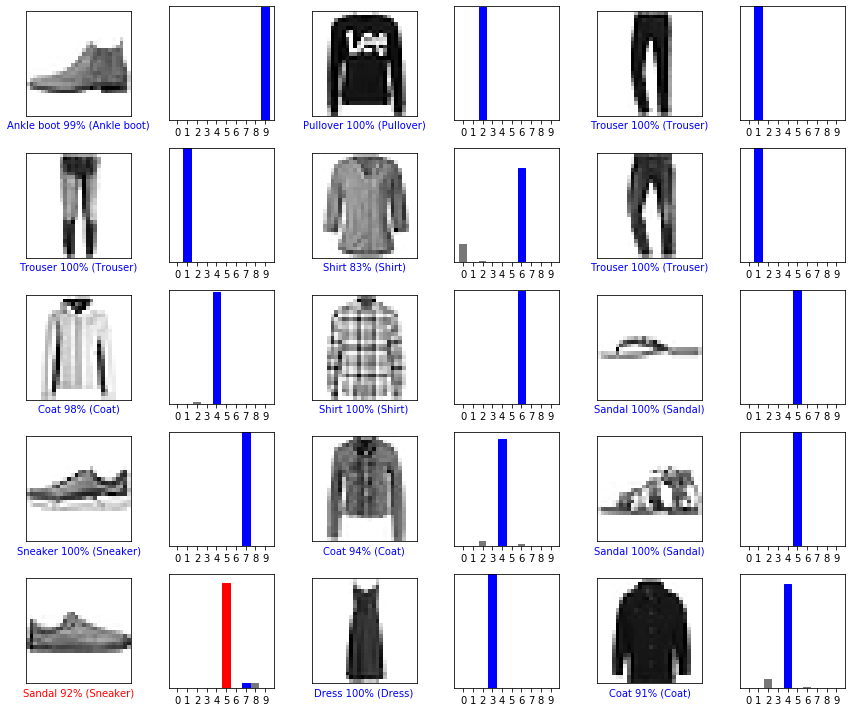

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()

Use the Trained model

In [48]:
img = test_images[1]
print(img.shape)

(28, 28)


In [49]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [52]:
prediction_single = prob_model.predict(img)
print(prediction_single)

[[2.6785052e-05 2.0544469e-11 9.9664056e-01 1.2818643e-11 3.0071249e-03
  6.3188338e-10 3.2549255e-04 1.1188190e-15 3.1057140e-10 3.2752609e-14]]


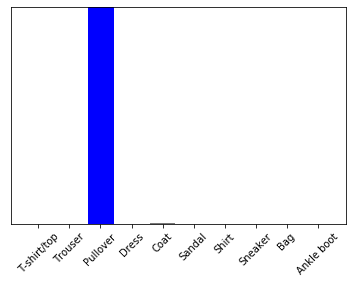

In [58]:
plot_value_array(1, prediction_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)